In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


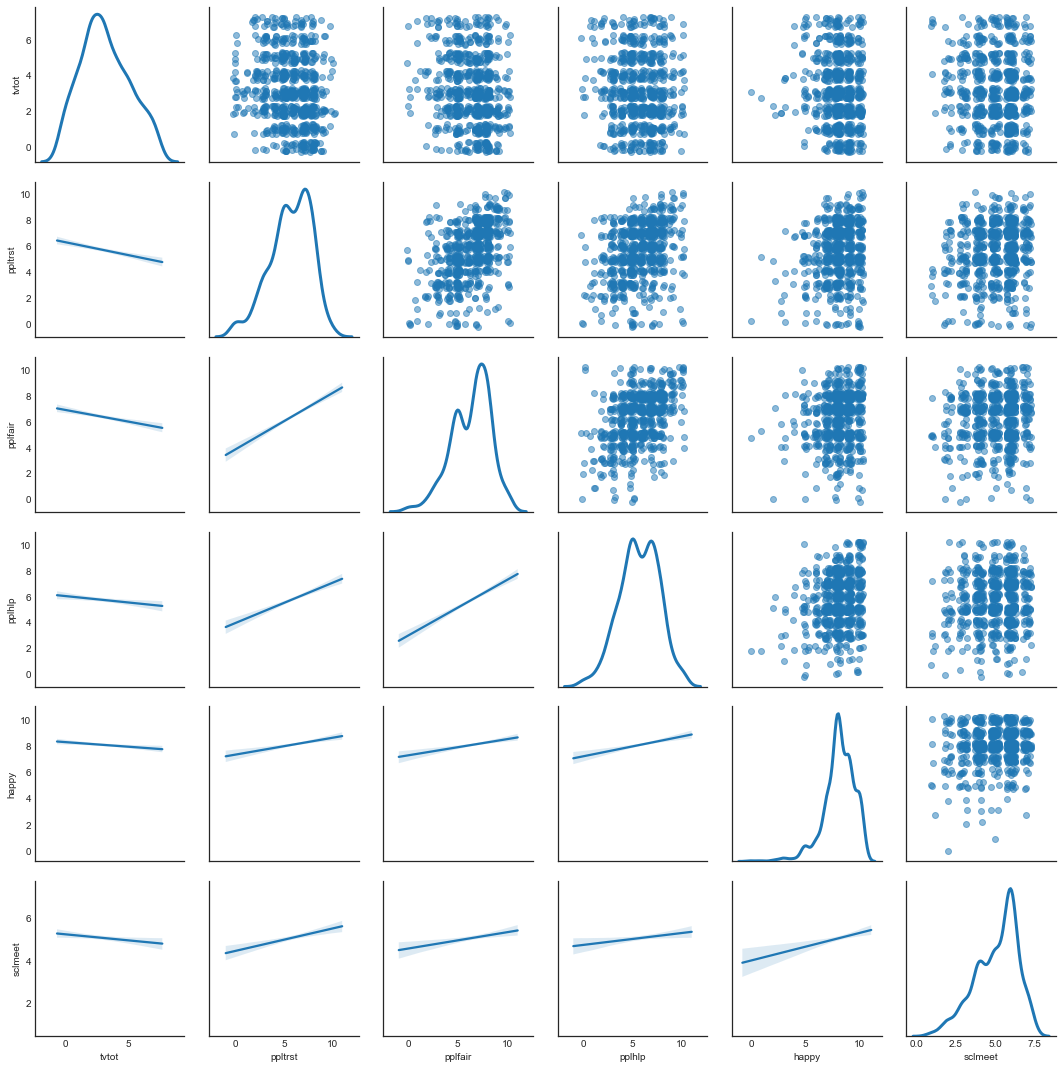

In [2]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

# Take a subset of the data to make plots clearer.
df_czch = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['cntry', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet']
]

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_czch.loc[:, 'tvtot':'sclmeet'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.

            tvtot   ppltrst   pplfair    pplhlp     happy   sclmeet
tvtot    1.000000 -0.240432 -0.233280 -0.176517 -0.265293 -0.144105
ppltrst -0.240432  1.000000  0.605589  0.500378  0.297432  0.148949
pplfair -0.233280  0.605589  1.000000  0.532927  0.275204  0.105886
pplhlp  -0.176517  0.500378  0.532927  1.000000  0.269627  0.109383
happy   -0.265293  0.297432  0.275204  0.269627  1.000000  0.244289
sclmeet -0.144105  0.148949  0.105886  0.109383  0.244289  1.000000


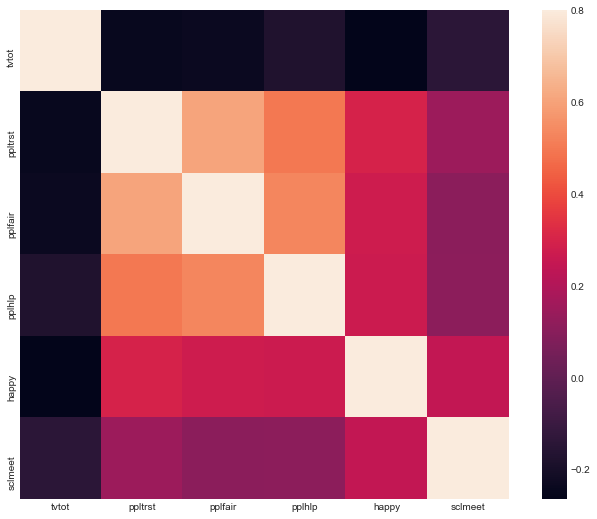

In [3]:
# Make the correlation matrix.
corrmat = df_czch.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


C:\Users\mhuh22\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


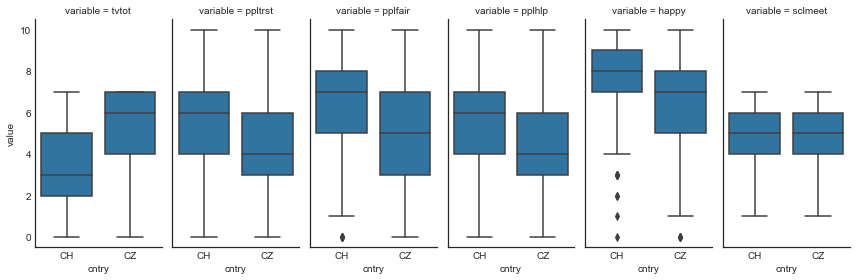

       happy                                               pplfair            \
       count      mean       std  min  25%  50%  75%   max   count      mean   
cntry                                                                          
CH     770.0  8.088312  1.437920  0.0  7.0  8.0  9.0  10.0   770.0  6.350649   
CZ     646.0  6.770898  2.053582  0.0  5.0  7.0  8.0  10.0   649.0  4.959938   

      ...  sclmeet       tvtot                                               
      ...      75%  max  count      mean       std  min  25%  50%  75%  max  
cntry ...                                                                    
CH    ...      6.0  7.0  772.0  3.141192  1.913706  0.0  2.0  3.0  5.0  7.0  
CZ    ...      6.0  7.0  653.0  5.142420  1.851775  0.0  4.0  6.0  7.0  7.0  

[2 rows x 48 columns]
tvtot
Ttest_indResult(statistic=19.962218108197227, pvalue=2.321576398582079e-78)
ppltrst
Ttest_indResult(statistic=-10.928900558029875, pvalue=9.394029017549828e-27)
pplfair
Ttest_indRe

In [4]:
# Plot all the variables with boxplots for each country.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_czch
df_long = pd.melt(df_long, id_vars=['cntry'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "cntry", "value")
plt.show()

# Descriptive statistics by group.
print(df_czch.groupby('cntry').describe())

# Test whether group differences are significant.
for col in df_czch.loc[:,'tvtot':'sclmeet'].columns:
    print(col)
    print(stats.ttest_ind(
        df_czch[df_czch['cntry'] == 'CZ'][col].dropna(),
        df_czch[df_czch['cntry'] == 'CH'][col].dropna()
    ))